In [1]:
cd C:\Users\zsassi\test

c:\Users\zsassi\test


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
train_df = pd.read_csv("train.csv")
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df = pd.read_csv('test.csv')
test_df.head()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

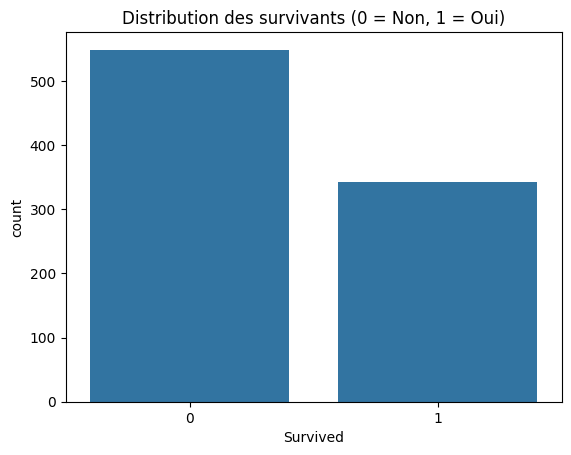

In [10]:
sns.countplot(data=train_df, x='Survived')
plt.title("Distribution des survivants (0 = Non, 1 = Oui)")
plt.show()

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing Age values with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill Embarked with the mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [13]:
# Label Encoding Sex
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')

In [19]:
# Extraire le titre depuis la colonne 'Name' (raw string pour éviter le warning)
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Regrouper les titres rares
train_df['Title'] = train_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Uniformiser certains titres équivalents
train_df['Title'] = train_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Encoder les titres en nombres
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train_df['Title'] = train_df['Title'].map(title_mapping)

# Gérer les valeurs manquantes si besoin
train_df['Title'] = train_df['Title'].fillna(0)

In [20]:
# Supprimer les colonnes inutiles
train_df.drop(columns=['Name', 'Ticket'], inplace=True)
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0,1,2,3,4])
train_df['AgeGroup'] = train_df['AgeGroup'].astype(int)
train_df.drop(columns=['Cabin'], inplace=True)

In [21]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)               # Apprentissage
    y_pred = model.predict(X_test)            # Prédiction ici
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7877
Random Forest Accuracy: 0.8436
XGBoost Accuracy: 0.8045


c:\Users\zsassi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print("Confusion Matrix :")
    print(cm)

--- Logistic Regression ---
Accuracy  : 0.7877
Precision : 0.7432
Recall    : 0.7432
Confusion Matrix :
[[86 19]
 [19 55]]
--- Random Forest ---
Accuracy  : 0.8436
Precision : 0.8286
Recall    : 0.7838
Confusion Matrix :
[[93 12]
 [16 58]]
--- XGBoost ---
Accuracy  : 0.8045
Precision : 0.7600
Recall    : 0.7703
Confusion Matrix :
[[87 18]
 [17 57]]


c:\Users\zsassi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X, y)

print(grid.best_params_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
best_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=8, 
    min_samples_split=2, 
    random_state=42
)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)